In [1]:
import pandas
import matplotlib.pyplot as plt
from collections import namedtuple

In [2]:
XY_plot = namedtuple("XY_plot", ["x", "y"])

In [6]:
DATA_PATH = "../dataSave"
METRICS_TYPES = ["CLIENT_PROCESSING", "MEAN_ONE_REQUEST_BY_CLIENT", "REQUEST_PROCESSING"]
CHANGEABLE_VARIABLE_TYPES = ["SIZE_OF_ARRAY_IN_REQUEST", "NUMBER_OF_CLIENTS", "SLEEP_TIME_AFTER_RESPONSE"]
SERVER_TYPES = ["INDIVIDUAL_THREAD_SERVER", "BLOCKING_SERVER", "NOT_BLOCKING_SERVER"]

In [4]:
dict_data = dict()
for metrica in METRICS_TYPES:
    for variable in CHANGEABLE_VARIABLE_TYPES: 
        for server in SERVER_TYPES:
            path = f"{DATA_PATH}/{variable}/{server}/{metrica}"
            try:
                with open(path, "r") as file:
                    x_list = []
                    y_list = []
                    for line in file:
                        x, y = map(float, line.split())
                        x_list.append(x)
                        y_list.append(y)
                    dict_data[(metrica, variable, server)] = XY_plot(x_list, y_list)
            except Exception as ignore:
                print(path, " without success")

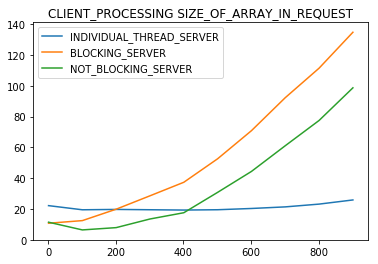

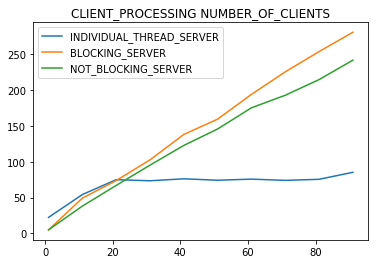

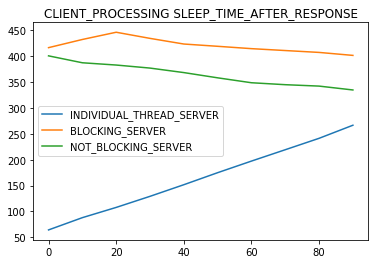

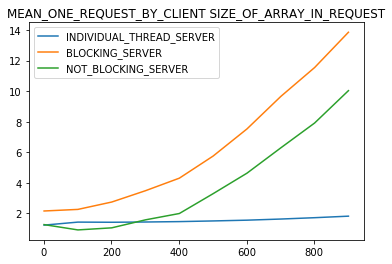

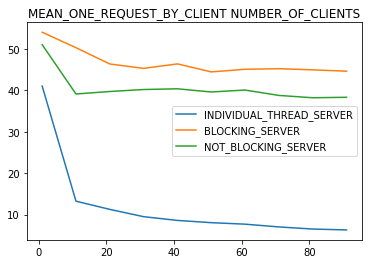

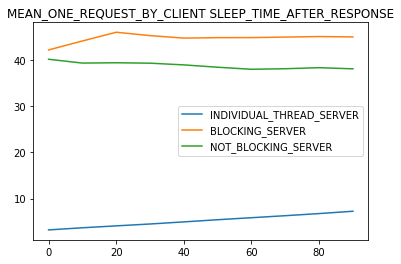

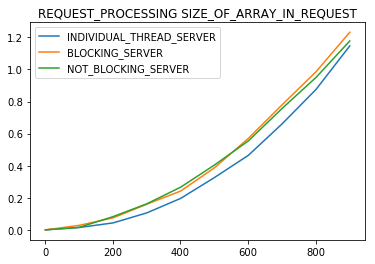

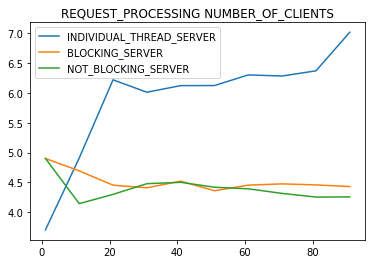

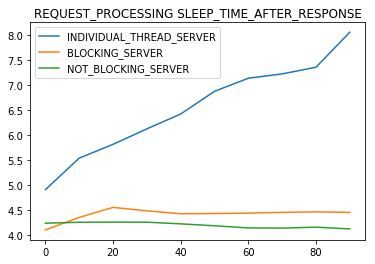

In [5]:
for metrica in METRICS_TYPES:
    for variable in CHANGEABLE_VARIABLE_TYPES:
        for server in SERVER_TYPES:
            try:
                x = dict_data[(metrica, variable, server)].x
                y = dict_data[(metrica, variable, server)].y
                plt.plot(x, y, label=server)
            except Exception as ignore:
                pass
        plt.legend()
        plt.title(f"{metrica} {variable}")
        plt.show()

Заголовок каждого графика следует читать так: метрика, для которой изображены графики, изменяемая переменная.

Оставшиеся параметры брались из следующих стандартных значений:
* "numberOfClients" : 100,
* "sizeOfArrayInRequest" : 1000,
* "sleepTimeAfterResponse" : 0,
* "numberOfRequestByClient" : 10